In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['yelp-train', 'yelptest', 'glove-global-vectors-for-word-representation']


**Exploratory Data Analysis**

In [33]:
import pandas as pd
import numpy as np

In [34]:
data_train = pd.read_csv('../input/yelp-train/train.csv',header=None)

In [35]:
data_train.columns = ['deceptive','text']

In [36]:
data_train.head(5)

,deceptive,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [37]:
data_test = pd.read_csv('../input/yelptest/test.csv',header=None)

In [38]:
data_test.columns = ['deceptive','text']

In [39]:
data_test.head(5)

,deceptive,text
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
deceptive    560000 non-null int64
text         560000 non-null object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Number of Deceptive and Non Deceptive reviews (Deceptive=1 & NonDeceptive=2)')

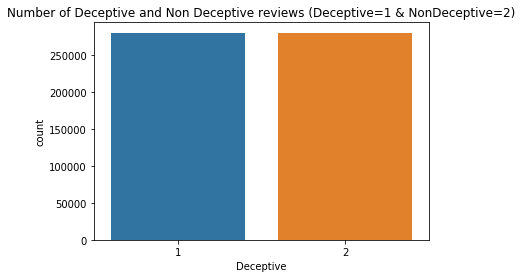

In [42]:
sns.countplot(data_train.deceptive)
plt.xlabel('Deceptive')
plt.title('Number of Deceptive and Non Deceptive reviews (Deceptive=1 & NonDeceptive=2)')

In [43]:
#dataset description
data_train.groupby('deceptive').describe()

text ...      
            count ...  freq
deceptive         ...      
1          280000 ...     1
2          280000 ...     1

[2 rows x 4 columns]

In [45]:
#word count
data_train['word_count'] = data_train['text'].apply(lambda x: len(str(x).split(" ")))
data_train[['text','word_count']].head()

,text,word_count
0,"Unfortunately, the frustration of being Dr. Go...",122
1,Been going to Dr. Goldberg for over 10 years. ...,97
2,I don't know what Dr. Goldberg was like before...,212
3,I'm writing this review to give you a heads up...,193
4,All the food is great here. But the best thing...,80


In [46]:
#character count including spaces
data_train['char_count'] = data_train['text'].str.len() ## this also includes spaces
data_train[['text','char_count']].head()

,text,char_count
0,"Unfortunately, the frustration of being Dr. Go...",643
1,Been going to Dr. Goldberg for over 10 years. ...,495
2,I don't know what Dr. Goldberg was like before...,1143
3,I'm writing this review to give you a heads up...,1050
4,All the food is great here. But the best thing...,425


In [47]:
#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data_train['avg_word'] = data_train['text'].apply(lambda x: avg_word(x))
data_train[['text','avg_word']].head()

,text,avg_word
0,"Unfortunately, the frustration of being Dr. Go...",4.539130
1,Been going to Dr. Goldberg for over 10 years. ...,4.113402
2,I don't know what Dr. Goldberg was like before...,4.417062
3,I'm writing this review to give you a heads up...,4.445596
4,All the food is great here. But the best thing...,4.613333


In [48]:
#no of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

data_train['stopwords'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_train[['text','stopwords']].head()

,text,stopwords
0,"Unfortunately, the frustration of being Dr. Go...",47
1,Been going to Dr. Goldberg for over 10 years. ...,47
2,I don't know what Dr. Goldberg was like before...,96
3,I'm writing this review to give you a heads up...,79
4,All the food is great here. But the best thing...,21


In [49]:
#no of special characters
data_train['spchar'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data_train[['text','spchar']].head()

,text,spchar
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,0
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,0


In [50]:
#no of numerics
data_train['numerics'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_train[['text','numerics']].head()

,text,numerics
0,"Unfortunately, the frustration of being Dr. Go...",2
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,1
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,0


In [51]:
#no of uppercase characters
data_train['upper'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data_train[['text','upper']].head()

,text,upper
0,"Unfortunately, the frustration of being Dr. Go...",5
1,Been going to Dr. Goldberg for over 10 years. ...,5
2,I don't know what Dr. Goldberg was like before...,8
3,I'm writing this review to give you a heads up...,10
4,All the food is great here. But the best thing...,1


**Preprocessing**

In [52]:
#to lowercase
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_train['text'].head()

0    unfortunately, the frustration of being dr. go...
1    been going to dr. goldberg for over 10 years. ...
2    i don't know what dr. goldberg was like before...
3    i'm writing this review to give you a heads up...
4    all the food is great here. but the best thing...
Name: text, dtype: object

In [53]:
#removing punctuation
data_train['text'] = data_train['text'].str.replace('[^\w\s]','')
data_train['text'].head()

0    unfortunately the frustration of being dr gold...
1    been going to dr goldberg for over 10 years i ...
2    i dont know what dr goldberg was like before m...
3    im writing this review to give you a heads up ...
4    all the food is great here but the best thing ...
Name: text, dtype: object

In [54]:
#removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_train['text'].head()

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think one 1st patie...
2    dont know dr goldberg like moving arizona let ...
3    im writing review give heads see doctor office...
4    food great best thing wings wings simply fanta...
Name: text, dtype: object

In [55]:
#removing common word
freq = pd.Series(' '.join(data_train['text']).split()).value_counts()[:10]
freq

food       319953
place      316445
good       290108
like       259145
get        235863
one        231827
time       209760
would      206953
great      205939
service    202014
dtype: int64

In [56]:
#removing common word
freq = list(freq.index)
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data_train['text'].head()

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think 1st patients ...
2    dont know dr goldberg moving arizona let tell ...
3    im writing review give heads see doctor office...
4    best thing wings wings simply fantastic wet ca...
Name: text, dtype: object

In [57]:
#remvoing rare words
freq = pd.Series(' '.join(data_train['text']).split()).value_counts()[-10:]
freq

bjorks            1
purchasennof      1
holidaysalso      1
yumminessnnnot    1
snapnnonly        1
plusnncant        1
andstaff          1
thinggeezare      1
meatnstuffed      1
alsoncarne        1
dtype: int64

In [58]:
#removing rare words
freq = list(freq.index)
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data_train['text'].head()

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think 1st patients ...
2    dont know dr goldberg moving arizona let tell ...
3    im writing review give heads see doctor office...
4    best thing wings wings simply fantastic wet ca...
Name: text, dtype: object

In [59]:
#spelling correction
from textblob import TextBlob
data_train['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think st patients s...
2    dont know dr goldberg moving arizona let tell ...
3    in writing review give heads see doctor office...
4    best thing wings wings simply fantastic wet ca...
Name: text, dtype: object

In [61]:
#tokenization
TextBlob(data_train['text'][1]).words

WordList(['going', 'dr', 'goldberg', '10', 'years', 'think', '1st', 'patients', 'started', 'mhmg', 'hes', 'years', 'really', 'big', 'picture', 'former', 'gyn', 'dr', 'markoff', 'found', 'fibroids', 'explores', 'options', 'patient', 'understanding', 'doesnt', 'judge', 'asks', 'right', 'questions', 'thorough', 'wants', 'kept', 'loop', 'every', 'aspect', 'medical', 'health', 'life'])

In [62]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data_train['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    unfortun frustrat dr goldberg patient repeat e...
1    go dr goldberg 10 year think 1st patient start...
2    dont know dr goldberg move arizona let tell st...
3    im write review give head see doctor offic sta...
4    best thing wing wing simpli fantast wet cajun ...
Name: text, dtype: object

In [63]:
#lemmetization
from textblob import Word
data_train['text'] = data_train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_train['text'].head()

0    unfortunately frustration dr goldberg patient ...
1    going dr goldberg 10 year think 1st patient st...
2    dont know dr goldberg moving arizona let tell ...
3    im writing review give head see doctor office ...
4    best thing wing wing simply fantastic wet caju...
Name: text, dtype: object

**Advance Text Processing**

In [64]:
#N-grams
TextBlob(data_train['text'][0]).ngrams(2)

[WordList(['unfortunately', 'frustration']),
 WordList(['frustration', 'dr']),
 WordList(['dr', 'goldberg']),
 WordList(['goldberg', 'patient']),
 WordList(['patient', 'repeat']),
 WordList(['repeat', 'experience']),
 WordList(['experience', 'ive']),
 WordList(['ive', 'many']),
 WordList(['many', 'doctor']),
 WordList(['doctor', 'nyc']),
 WordList(['nyc', 'doctor']),
 WordList(['doctor', 'terrible']),
 WordList(['terrible', 'staff']),
 WordList(['staff', 'seems']),
 WordList(['seems', 'staff']),
 WordList(['staff', 'simply']),
 WordList(['simply', 'never']),
 WordList(['never', 'answer']),
 WordList(['answer', 'phone']),
 WordList(['phone', 'usually']),
 WordList(['usually', 'take']),
 WordList(['take', '2']),
 WordList(['2', 'hour']),
 WordList(['hour', 'repeated']),
 WordList(['repeated', 'calling']),
 WordList(['calling', 'answer']),
 WordList(['answer', 'want']),
 WordList(['want', 'deal']),
 WordList(['deal', 'run']),
 WordList(['run', 'problem']),
 WordList(['problem', 'many']),


In [65]:
#Term frequency
tf1 = (data_train['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,patient,2
1,dr,2
2,year,2
3,explores,1
4,kept,1
5,judge,1
6,found,1
7,medical,1
8,goldberg,1
9,started,1


In [66]:
#inverse document frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data_train.shape[0]/(len(data_train[data_train['text'].str.contains(word)])))

tf1

,words,tf,idf
0,patient,2,4.511322
1,dr,2,1.218428
2,year,2,2.425439
3,explores,1,11.289782
4,kept,1,3.571541
5,judge,1,5.420889
6,found,1,2.801429
7,medical,1,6.007304
8,goldberg,1,11.038467
9,started,1,3.265013


In [67]:
#term freq - inverse document freq
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,patient,2,4.511322,9.022644
1,dr,2,1.218428,2.436856
2,year,2,2.425439,4.850878
3,explores,1,11.289782,11.289782
4,kept,1,3.571541,3.571541
5,judge,1,5.420889,5.420889
6,found,1,2.801429,2.801429
7,medical,1,6.007304,6.007304
8,goldberg,1,11.038467,11.038467
9,started,1,3.265013,3.265013


In [68]:
#sparse matrix tf-idf freq
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data_train['text'])

train_vect

<560000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 16479223 stored elements in Compressed Sparse Row format>

In [70]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(data_train['text'])
train_bow

<560000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 19312429 stored elements in Compressed Sparse Row format>

**Sentiment Analysis**

In [71]:
#sentiment of review
data_train['text'][:5].apply(lambda x: TextBlob(x).sentiment)

0     (-0.10714285714285714, 0.5153061224489796)
1     (0.07142857142857142, 0.15892857142857142)
2    (-0.11153846153846153, 0.36987179487179483)
3       (0.11538461538461539, 0.480952380952381)
4      (0.49318181818181817, 0.5954545454545455)
Name: text, dtype: object

***the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. ***

In [ ]:
data_train['sentiment'] = data_train['text'].apply(lambda x: TextBlob(x).sentiment[0] )
data_train[['text','sentiment']].head()